# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os
import datetime as datetime

In [2]:
# Set up Splinter
driver_path = os.path.join(os.path.expanduser("~"),"webdrivers","chromedriver.exe")
browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
table = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = table.find_all(class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
list_of_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    data = row.find_all('td')
    row_data = [elem.text for elem in data]
    list_of_rows.append(row_data)   

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp = pd.DataFrame(list_of_rows, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [8]:
# Confirm DataFrame was created successfully
mars_temp.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
mars_temp.terrestrial_date = pd.to_datetime(mars_temp.terrestrial_date)

convert_dict = {'id':int,
                'sol':int,
                'ls':int,
                'month':int,
                'min_temp':float,
                'pressure':float}
mars_temp = mars_temp.astype(convert_dict)


In [11]:
# Confirm type changes were successful by examining data types again
mars_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

# Finding out how mnay unique months there are
unique_months = mars_temp['month'].nunique()
print(f"There are {unique_months} months on Mars")

There are 12 months on Mars


In [27]:
# 2. How many Martian days' worth of data are there?
# make sure the values in the sol column are unique.

# Finding out how many unique Martian days there are
martian_days = mars_temp['sol'].nunique()
print(f"There are {martian_days} Martian days worth of data")

There are 1867 Martian days worth of data


In [28]:
# 3. What is the average low temperature by month?

# Grouping by month and calculating the average minimum temperature for each month
avg_low_temp_month = mars_temp.groupby(['month'])['min_temp'].mean()
avg_low_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

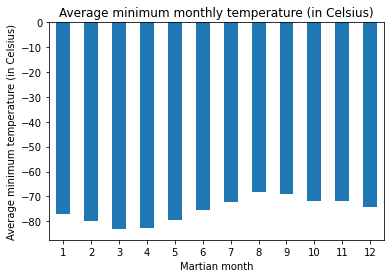

In [31]:
# Plot the average temperature by month
temp_month_graph = avg_low_temp_month.plot(kind="bar", title="Average minimum monthly temperature (in Celsius)", rot=360)
temp_month_graph.set_xlabel("Martian month")
temp_month_graph.set_ylabel("Average minimum temperature (in Celsius)");

In [34]:
# Identify the coldest and hottest months in Curiosity's location

# Using the average low temperature results by month calculated earlier, sort values and bring back the first (coldest) and last (hottest) values and corresponding month
coldest_month = avg_low_temp_month.sort_values()[:1]
hottest_month = avg_low_temp_month.sort_values()[-1:]

print(f"The coldest month is month {coldest_month.index.values} with an average minimum temperature of {coldest_month.values} Celsius")
print(f"The hottest month is month {hottest_month.index.values} with an average minimum temperature of {hottest_month.values} Celsius")

The coldest month is month [3] with an average minimum temperature of [-83.30729167] Celsius
The hottest month is month [8] with an average minimum temperature of [-68.38297872] Celsius


In [17]:
# 4. Average pressure by Martian month

# Group by month and calculate the average pressure for each month
avg_pressure_month = mars_temp.groupby(['month'])['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

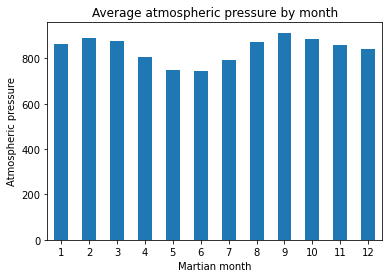

In [18]:
# Plot the average pressure by month
pressure_month_graph = avg_pressure_month.plot(kind="bar", title="Average atmospheric pressure by month", rot=360)
pressure_month_graph.set_xlabel("Martian month")
pressure_month_graph.set_ylabel("Atmospheric pressure");

In [33]:
# Identify months with the highest and lowest pressure

# Using the average pressure by month calculated earlier, sort values and bring back the first (lowest) and last (highest) values and corresponding month
month_lowest_pressure = avg_pressure_month.sort_values()[:1]
month_highest_pressure = avg_pressure_month.sort_values()[-1:]

print(f"Atmospheric pressure is lowest in month {month_lowest_pressure.index.values} with an average pressure of {month_lowest_pressure.values}")
print(f"Atmospheric pressure is highest in month {month_highest_pressure.index.values} with an average pressure of {month_highest_pressure.values}")

Atmospheric pressure is lowest in month [6] with an average pressure of [745.05442177]
Atmospheric pressure is highest in month [9] with an average pressure of [913.30597015]


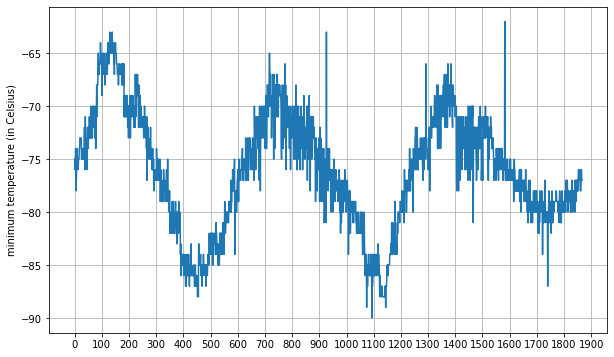

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature.
import numpy as np
temp = mars_temp['min_temp']
plt.figure(figsize=(10,6))
plt.plot(temp)
plt.ylabel("minimum temperature (in Celsius)")
plt.xticks(np.arange(0, 2000, 100))
plt.grid();

Looking at the distance between the peaks and visually estimating, the second peak occurs at 750 and the thrid at 1425.  The distance between them being 675 days.  
Based on this, a Maritian year appears to be around 675 days.

--------------------

I also did some additional analysis for the length of a martian year in terrestrial days...

>- The time a planet takes to revolve around the sun is called a year.

>- Solar longitude (ls) can be used to understand where a planet is in relation to the sun.

>- As the solar longitude goes from 0 to 360 degrees, I have used this to calcuate the number of terrestrial days in a martian year.

In [36]:
# To do this I selected the data points when the solar longitude (ls) was at its greatest (in this data set it is 359)
ls_peak = mars_temp.loc[mars_temp['ls']==359]
ls_peak

,id,terrestrial_date,sol,ls,month,min_temp,pressure
302,316,2013-07-30,349,359,12,-75.0,852.0
303,318,2013-07-31,350,359,12,-76.0,853.0
923,955,2015-06-17,1017,359,12,-78.0,850.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


In [22]:
# For each year there are two data points linked to the solar longitude value of 359
# Below I have filtered the dataframe to select the final date for each 'ls' data point
ls_peak = ls_peak.loc[(ls_peak['id']==318)|(ls_peak['id']==956)|(ls_peak['id']==1608)]
ls_peak

,id,terrestrial_date,sol,ls,month,min_temp,pressure
303,318,2013-07-31,350,359,12,-76.0,853.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


In [23]:
# I then used the above dataframe to calcuate the difference (in terms of terrestrial days) from one 'ls' being equal to 359 to the next.
# This indicates Mars has rotated around the sun once, and that a Martian year has passed.  Therefore providing the number of terrestrial days in a Maritan year. 

# Calcuate the number of terrestrial days that pass between 'ls' being equal to 359 (wich indicates Mars has rotated around the sun once).
difference_one = ls_peak.loc[924][1] - ls_peak.loc[303][1]
difference_two = ls_peak.loc[1578][1] - ls_peak.loc[924][1]

print(difference_one)
print(difference_two)

687 days 00:00:00
687 days 00:00:00


> Based on the above calcuation, a year on Mars is equivalent to 687 terrestrial (earth) days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_temp.to_csv("output/mars_temp.csv", index = False)

In [25]:
browser.quit()